From Longdaq to dr/r.    
Almost the same as vdaq way.

In [3]:
import Common_Functions as cf
from OI_Functions.Map_Subtractor import Sub_Map_Generator
from OI_Functions.VDaQ_dRR_Generator import BLK2DRR
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2
import pandas as pd

wp = r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\Run00_spon\rr'

reader = BLK2DRR(wp)
reader.Read_All_Frames()

R_value_series = reader.all_graphs
R_value_series.shape

(61, 1, 10, 540, 654)

We will stack all graph into frame,this is the continous recording series.

In [5]:
series_raw = np.reshape(R_value_series,(-1,540,654))
drr_series = series_raw/series_raw.mean(0)-1
drr_series.shape

(610, 540, 654)

In [6]:
cf.Save_Variable(wp,'DRR_series',drr_series)

True

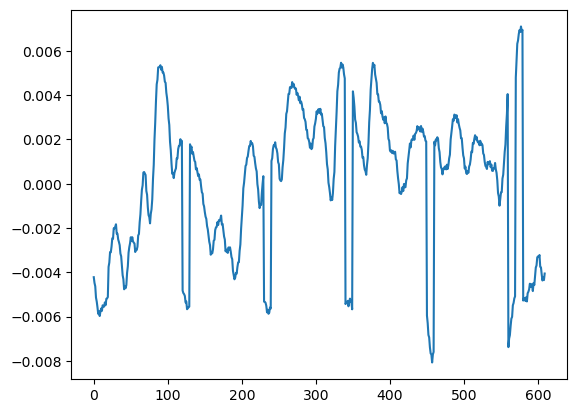

In [8]:
plt.plot(drr_series[:,250:300,250:300].mean(-1).mean(-1))

<AxesSubplot: >

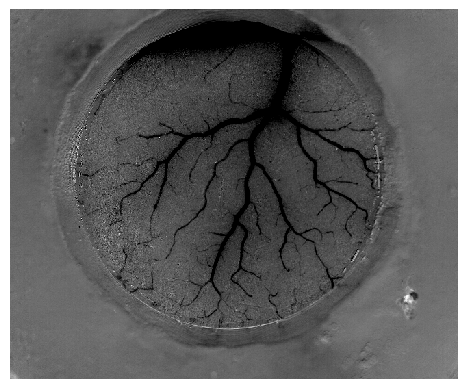

In [14]:
img = drr_series[100:200,:,:].mean(0)
sns.heatmap(img,center = 0,square = True,xticklabels=False,yticklabels=False,cbar=False,cmap = 'gray',vmax = 0.003,vmin = -0.003)